# Prior distribtuion

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

In [21]:
import matplotlib.pyplot as plt

## Logit-Normal
See more on [logit-normal distribution Wikipedia page](https://en.wikipedia.org/wiki/Logit-normal_distribution).

In practicce, we use $\mu=0, \sigma=3.0$ as prior

In [30]:
def _logit(x):
    return tf.math.log(x / (1 - x))

_logit(np.array([0.6]))

<tf.Tensor: id=7912, shape=(1,), dtype=float64, numpy=array([0.40546511])>

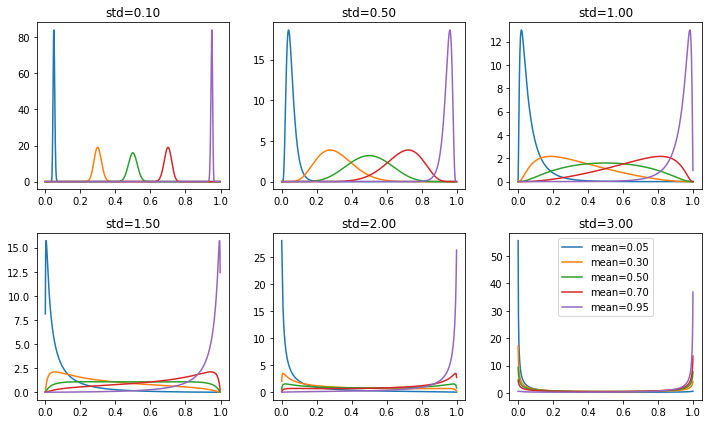

In [40]:
_means = np.array([0.05, 0.3, 0.5, 0.7, 0.95], dtype=np.float32)
_vars = np.array([0.1, 0.5, 1.0, 1.5, 2.0, 3.0], dtype=np.float32)

xx = np.arange(0.001, 0.999, 0.001).astype(np.float32)

fig = plt.figure(figsize=(10, 6))
for j in range(len(_vars)):
    plt.subplot(2, 3, j + 1)
    for i in range(len(_means)):
        _model = tfd.Normal(_logit(_means[i:i+1]), _vars[j:j+1])
        _pdf = _model.prob(_logit(xx)) * 1 / (xx * (1 - xx))
        plt.plot(xx, _pdf, label="mean=%.2f" %(_means[i]))
    plt.title("std=%.2f" %(_vars[j]))
    if j == 5:
        plt.legend(loc="best")
        
plt.tight_layout()
plt.show()

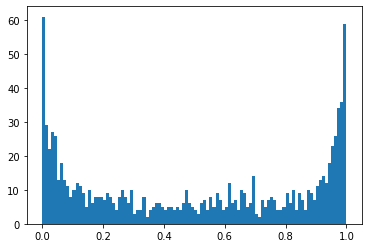

In [73]:
_model = tfd.Normal([0], [3])
plt.hist(np.array(tf.sigmoid(_model.sample(1000))).reshape(-1), bins=100)
plt.show()

## Gamma distribution

See more on [Gamma distribution Wikipedia page](https://en.wikipedia.org/wiki/Gamma_distribution)
In practice, we use $\alpha=10, \beta=3$ as prior

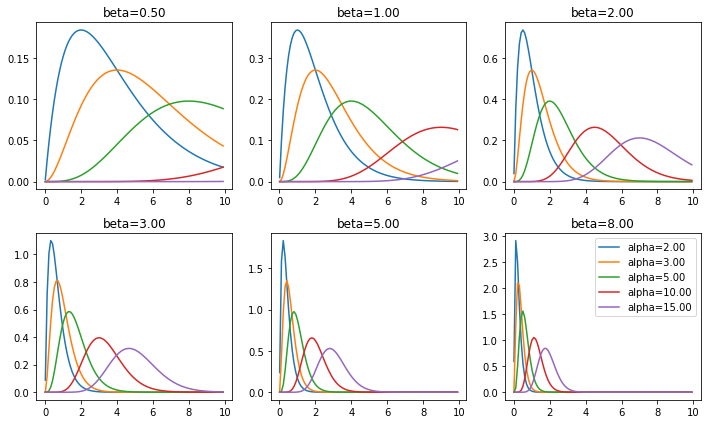

In [65]:
_alpha = np.array([2, 3, 5, 10, 15], dtype=np.float32)
_beta = np.array([0.5, 1, 2, 3, 5, 8], dtype=np.float32)

xx = np.arange(0.01, 10, 0.1).astype(np.float32)

fig = plt.figure(figsize=(10, 6))
for j in range(len(_vars)):
    plt.subplot(2, 3, j + 1)
    for i in range(len(_means)):
        _model = tfd.Gamma(_alpha[i:i+1], _beta[j:j+1])
        _pdf = _model.prob(xx)
        plt.plot(xx, _pdf, label="alpha=%.2f" %(_alpha[i]))
    plt.title("beta=%.2f" %(_beta[j]))
    if j == 5:
        plt.legend(loc="best")
        
plt.tight_layout()
plt.show()

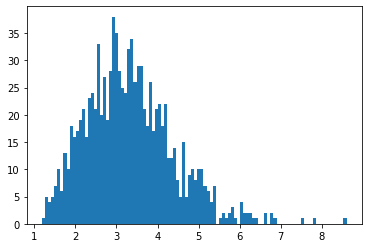

In [70]:
_model = tfd.Gamma([10], [3])
plt.hist(_model.sample(1000).numpy().reshape(-1), bins=100)
plt.show()